### Wrangling the Billboard Top 100 - A

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
import warnings
warnings.filterwarnings("ignore")

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
bb = pd.read_csv("billboard.csv")
bb.iloc[0:1]

,Unnamed: 0,url,week_id,week_position,song,performer,song_id,instance,previous_week_position,peak_position,weeks_on_chart,year,week
0,1,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4,1965,29


In [3]:
bb = bb[["performer", "song", "year", "week", "week_position"]]
bb.iloc[0:1]

,performer,song,year,week,week_position
0,Patty Duke,Don't Just Stand There,1965,29,34


In [4]:
bb_grps = bb.groupby(["performer","song"])[["year","week","week_position"]].count()
top_10 = bb_grps.sort_values(by="year", ascending=False)[:10]
top_10 = pd.DataFrame(top_10["year"])
top_10.columns = ["count"]
top_10

,,count
performer,song,
Imagine Dragons,Radioactive,87
AWOLNATION,Sail,79
The Weeknd,Blinding Lights,76
Jason Mraz,I'm Yours,76
LeAnn Rimes,How Do I Live,69
OneRepublic,Counting Stars,68
LMFAO Featuring Lauren Bennett & GoonRock,Party Rock Anthem,68
Jewel,Foolish Games/You Were Meant For Me,65
Adele,Rolling In The Deep,65


The table above gives us the top 10 most popular songs since 1958, as measured by the total number of weeks that a song spent on the Billboard Top 100.

### Wrangling the Billboard Top 100 - B

In [5]:
bb

,performer,song,year,week,week_position
0,Patty Duke,Don't Just Stand There,1965,29,34
1,Patty Duke,Don't Just Stand There,1965,30,22
2,Patty Duke,Don't Just Stand There,1965,31,14
3,Patty Duke,Don't Just Stand There,1965,32,10
4,Patty Duke,Don't Just Stand There,1965,33,8
...,...,...,...,...,...
327890,Ariana Grande,God Is A Woman,2018,42,22
327891,Rose Royce,I Wanna Get Next To You,1977,21,22
327892,Eric Clapton And His Band,I Can't Stand It,1981,21,22
327893,Al Green,Here I Am Come & Take Me,1973,39,22


In [6]:
bb_nodup = bb.drop_duplicates(subset=["performer","song","year"])

In [7]:
bb_nodup.head()

,performer,song,year,week,week_position
0,Patty Duke,Don't Just Stand There,1965,29,34
8,Teddy Pendergrass,Don't Keep Wasting My Time,1997,16,97
14,Wilson Pickett,Don't Knock My Love - Pt. 1,1971,17,96
26,Diana Ross & Marvin Gaye,Don't Knock My Love,1974,28,90
35,Bill Medley,Don't Know Much,1981,13,90


In [8]:
bb_nodup["song_unique_id"] = bb_nodup["performer"] + " - " + bb_nodup["song"]
bb_nodup.head()

,performer,song,year,week,week_position,song_unique_id
0,Patty Duke,Don't Just Stand There,1965,29,34,Patty Duke - Don't Just Stand There
8,Teddy Pendergrass,Don't Keep Wasting My Time,1997,16,97,Teddy Pendergrass - Don't Keep Wasting My Time
14,Wilson Pickett,Don't Knock My Love - Pt. 1,1971,17,96,Wilson Pickett - Don't Knock My Love - Pt. 1
26,Diana Ross & Marvin Gaye,Don't Knock My Love,1974,28,90,Diana Ross & Marvin Gaye - Don't Knock My Love
35,Bill Medley,Don't Know Much,1981,13,90,Bill Medley - Don't Know Much


In [9]:
bb_nodup = bb_nodup[(bb_nodup["year"] != 1958) & (bb_nodup["year"] != 2021)]

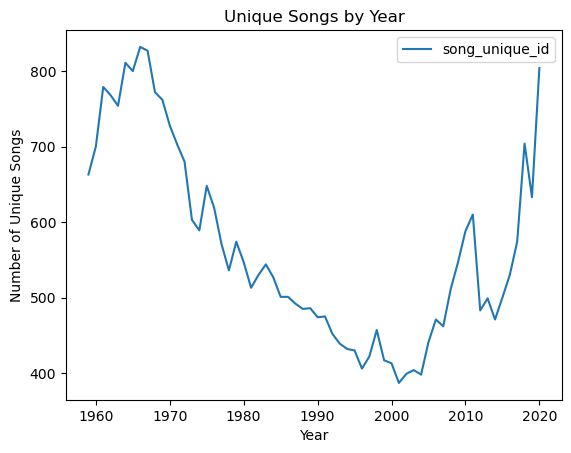

In [10]:
unique_songs_by_year = pd.DataFrame(bb_nodup.groupby(["year"])["song_unique_id"].count())
unique_songs_by_year.plot(kind="line")
plt.xlabel('Year')
plt.ylabel('Number of Unique Songs')
plt.title('Unique Songs by Year')
plt.show()

From the line chart above, we can observe that the "musical diversity" of the Billboard Top 100 was at its peak during the 1960s and then it kept decreasing for the next 40 years and hit its lowest in the 2000s. Post that, the diversity has again started to increase and the rate of increase is much higher than its decline before the 2000s.

### Wrangling the Billboard Top 100 - C

In [11]:
bb["ps_pair"] = bb["performer"] + " - " + bb["song"]
bb.head()

,performer,song,year,week,week_position,ps_pair
0,Patty Duke,Don't Just Stand There,1965,29,34,Patty Duke - Don't Just Stand There
1,Patty Duke,Don't Just Stand There,1965,30,22,Patty Duke - Don't Just Stand There
2,Patty Duke,Don't Just Stand There,1965,31,14,Patty Duke - Don't Just Stand There
3,Patty Duke,Don't Just Stand There,1965,32,10,Patty Duke - Don't Just Stand There
4,Patty Duke,Don't Just Stand There,1965,33,8,Patty Duke - Don't Just Stand There


In [12]:
wob = bb['ps_pair'].value_counts().rename("weeks on bb")
wob

ps_pair
Imagine Dragons - Radioactive                                             87
AWOLNATION - Sail                                                         79
The Weeknd - Blinding Lights                                              76
Jason Mraz - I'm Yours                                                    76
LeAnn Rimes - How Do I Live                                               69
                                                                          ..
Glee Cast - Girls Just Want To Have Fun                                    1
Armin van Buuren Featuring Trevor Guthrie - This Is What It Feels Like     1
The 21st Century - Remember The Rain?                                      1
Thirty Seconds To Mars - This Is War                                       1
Colbie Caillat - What If                                                   1
Name: weeks on bb, Length: 29389, dtype: int64

In [13]:
bb = pd.merge(bb,wob,left_on="ps_pair",right_index=True)

In [14]:
bb

,performer,song,year,week,week_position,ps_pair,weeks on bb
0,Patty Duke,Don't Just Stand There,1965,29,34,Patty Duke - Don't Just Stand There,11
1,Patty Duke,Don't Just Stand There,1965,30,22,Patty Duke - Don't Just Stand There,11
2,Patty Duke,Don't Just Stand There,1965,31,14,Patty Duke - Don't Just Stand There,11
3,Patty Duke,Don't Just Stand There,1965,32,10,Patty Duke - Don't Just Stand There,11
4,Patty Duke,Don't Just Stand There,1965,33,8,Patty Duke - Don't Just Stand There,11
...,...,...,...,...,...,...,...
327890,Ariana Grande,God Is A Woman,2018,42,22,Ariana Grande - God Is A Woman,22
327891,Rose Royce,I Wanna Get Next To You,1977,21,22,Rose Royce - I Wanna Get Next To You,17
327892,Eric Clapton And His Band,I Can't Stand It,1981,21,22,Eric Clapton And His Band - I Can't Stand It,17
327893,Al Green,Here I Am Come & Take Me,1973,39,22,Al Green - Here I Am Come & Take Me,15


In [15]:
ten_week_hits = bb[bb["weeks on bb"]>=10]
ten_week_hits.drop_duplicates(subset=["ps_pair"],inplace=True)

In [16]:
ten_week_hits.head()

,performer,song,year,week,week_position,ps_pair,weeks on bb
0,Patty Duke,Don't Just Stand There,1965,29,34,Patty Duke - Don't Just Stand There,11
14,Wilson Pickett,Don't Knock My Love - Pt. 1,1971,17,96,Wilson Pickett - Don't Knock My Love - Pt. 1,12
39,Linda Ronstadt (Featuring Aaron Neville),Don't Know Much,1989,39,72,Linda Ronstadt (Featuring Aaron Neville) - Don...,26
65,Cinderella,Don't Know What You Got (Till It's Gone),1988,36,74,Cinderella - Don't Know What You Got (Till It'...,22
87,Norah Jones,Don't Know Why,2002,39,78,Norah Jones - Don't Know Why,31


In [17]:
twh_atleast_30 = pd.DataFrame(ten_week_hits.groupby("performer")["song"].count().sort_values(ascending=False)[:19])

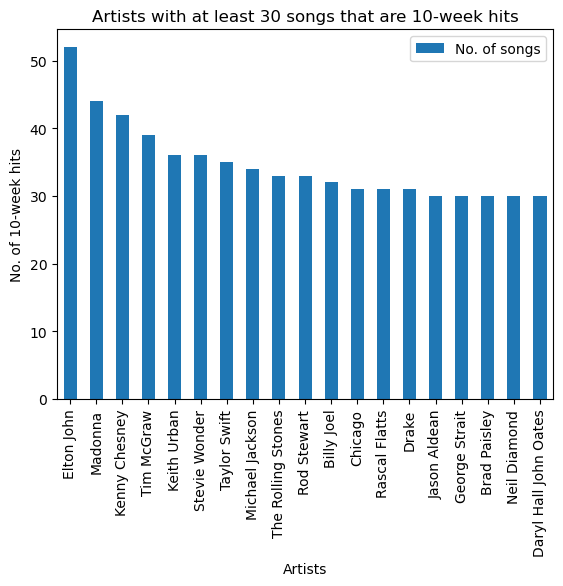

In [18]:
twh_atleast_30.columns = ["No. of songs"]
twh_atleast_30.plot(kind="bar")
plt.xlabel("Artists")
plt.ylabel("No. of 10-week hits")
plt.title("Artists with at least 30 songs that are 10-week hits")
plt.show()